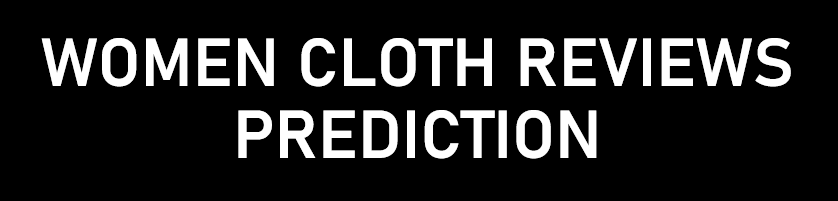

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
women = pd.read_csv('/content/drive/MyDrive/Projects/Minor Projects/Machine Learning Projects/Datasets/Womens Clothing E-Commerce Reviews.csv')

In [3]:
women.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
women.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [6]:
women.shape

(23486, 11)

In [7]:
women.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [8]:
women.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
women[women['Review Text']==""] = np.NaN

In [10]:
women['Review Text'].fillna("No Review",inplace = True)

In [11]:
women.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [12]:
women['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 23486, dtype: object

In [13]:
x = women['Review Text']
y = women['Rating']

In [14]:
women['Rating'].value_counts()

5.0    13131
4.0     5077
3.0     2871
2.0     1565
1.0      842
Name: Rating, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, stratify = y, random_state = 2529)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16440,), (7046,), (16440,), (7046,))

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer(lowercase = True, analyzer = 'word', ngram_range = (2,3), stop_words = 'english', max_features=5000)

In [20]:
x_train = cv.fit_transform(x_train)

In [23]:
cv.get_feature_names_out()

array(['10 12', '10 bought', '10 fit', ..., 'yellow color', 'yoga pants',
       'zipper little'], dtype=object)

In [24]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
x_test = cv.fit_transform(x_test)

In [26]:
cv.get_feature_names_out()

array(['10 12', '10 dress', '10 fit', ..., 'years come', 'years old',
       'yoga pants'], dtype=object)

In [27]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
model = MultinomialNB()

In [30]:
model.fit(x_train, y_train)

MultinomialNB()

In [31]:
y_pred = model.predict(x_test)

In [32]:
y_pred.shape

(7046,)

In [33]:
y_pred

array([1., 5., 5., ..., 5., 5., 5.])

In [35]:
model.predict_proba(x_test)

array([[0.71118473, 0.02625165, 0.15465118, 0.01496876, 0.09294369],
       [0.02416867, 0.04769471, 0.35268622, 0.16185007, 0.41360034],
       [0.03582725, 0.06660584, 0.12226277, 0.21618005, 0.55912409],
       ...,
       [0.02320281, 0.08950939, 0.08962183, 0.16719203, 0.63047394],
       [0.01167675, 0.00202714, 0.08539004, 0.34347398, 0.55743209],
       [0.03959824, 0.05612822, 0.00688869, 0.1560574 , 0.74132745]])

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
print(confusion_matrix(y_test, y_pred))

[[  15   13   45   36  144]
 [  43   43   86   85  213]
 [ 116   78  113  166  388]
 [ 166  108  194  336  719]
 [ 371  272  349  722 2225]]


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.02      0.06      0.03       253
         2.0       0.08      0.09      0.09       470
         3.0       0.14      0.13      0.14       861
         4.0       0.25      0.22      0.23      1523
         5.0       0.60      0.56      0.58      3939

    accuracy                           0.39      7046
   macro avg       0.22      0.21      0.21      7046
weighted avg       0.42      0.39      0.40      7046



In [39]:
women['Rating'].value_counts()

5.0    13131
4.0     5077
3.0     2871
2.0     1565
1.0      842
Name: Rating, dtype: int64

In [42]:
women.replace({'Rating' : { 1 : 0, 2 : 0, 3 : 0, 4 : 1, 5 : 1}}, inplace = True)

In [44]:
x = women['Review Text']
y = women['Rating']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, stratify = y, random_state = 2529)

In [47]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16440,), (7046,), (16440,), (7046,))

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
cv = CountVectorizer(lowercase = True, analyzer = 'word', ngram_range = (2,3), stop_words = 'english', max_features = 5000)

In [50]:
x_train = cv.fit_transform(x_train)

In [51]:
x_test = cv.fit_transform(x_test)

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
model = MultinomialNB()

In [55]:
model.fit(x_train, y_train)

MultinomialNB()

In [56]:
y_pred = model.predict(x_test)

In [57]:
y_pred.shape

(7046,)

In [58]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
print(confusion_matrix(y_test, y_pred))

[[ 449 1134]
 [ 989 4474]]


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.31      0.28      0.30      1583
         1.0       0.80      0.82      0.81      5463

    accuracy                           0.70      7046
   macro avg       0.56      0.55      0.55      7046
weighted avg       0.69      0.70      0.69      7046





---



# **ENHANCEMENT MADE BY CHATGPT**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset (replace the file path with the correct one)
women = pd.read_csv('/content/drive/MyDrive/Projects/Minor Projects/Machine Learning Projects/Datasets/Womens Clothing E-Commerce Reviews.csv')

# Data Exploration
women.head()
women.info()
women.describe()
women.shape
women.columns

# Handle missing values
women.isna().sum()
women[women['Review Text']==""] = np.NaN
women['Review Text'].fillna("No Review", inplace=True)
women.isna().sum()

# Feature and target
x = women['Review Text']
y = women['Rating']
women['Rating'].value_counts()

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, stratify=y, random_state=2529)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# Text Vectorization using CountVectorizer
cv = CountVectorizer(lowercase=True, analyzer='word', ngram_range=(2, 3), stop_words='english', max_features=5000)
x_train_vectorized = cv.fit_transform(x_train)
x_test_vectorized = cv.transform(x_test)

# Naive Bayes Model Training
model = MultinomialNB()
model.fit(x_train_vectorized, y_train)

# Predictions on the test set
y_pred = model.predict(x_test_vectorized)

# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

women['Rating'].value_counts()
women.replace({'Rating' : { 1 : 0, 2 : 0, 3 : 0, 4 : 1, 5 : 1}}, inplace = True)

x = women['Review Text']
y = women['Rating']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, stratify = y, random_state = 2529)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase = True, analyzer = 'word', ngram_range = (2,3), stop_words = 'english', max_features = 5000)
x_train = cv.fit_transform(x_train)
x_test = cv.fit_transform(x_test)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred.shape
y_pred

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
Confusion Matrix:
[[  33   43   53   27   97]
 [  25   87  143   74  141]
 [  20   96  274  199  272]
 [  15   48  171  385  904]
 [  13   40  132  398 